# extra_2.2.1.2_get_dt_split_positions.ipynb

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

datapath = '../3_data'
from os import chdir; chdir(datapath)
demo_data = pd.read_csv('demo_data_class.csv')

target = 'y'
classes = ['A', 'B']

In [3]:
## suppress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
## define functions for gini decrease
def gini(n1, n2):
    n = n1 + n2
    p1 = n1 / n
    p2 = n2 / n
    return((1 - p1) * (1 - p2) * 2)

## check
#print(gini(10, 10))
#print(gini(15, 5))
#print(gini(20, 0))

def gini_decrease(nl1, nl2, nr1, nr2):
    nl = nl1 + nl2
    nr = nr1 + nr2
    n = nl + nr
    g = gini(nl1 + nr1, nl2 + nr2)
    gl = gini(nl1, nl2) * nl / n
    gr = gini(nr1, nr2) * nr / n
    return(g - (gl + gr))

## check
#gini_decrease(7, 2, 3, 8)

In [5]:
## define function for detect best split position
def find_split_position(feature):
    
    ## split positions
    idx = np.unique(demo_data[feature])
    sp = []
    for i in range(len(idx) - 1):
        sp.append((idx[i] + idx[i+1]) / 2)
    
    ## calculate gini decrease for each split position
    cds = []

    for i in range(len(sp)):
        #print(i)

        subset_l = demo_data[demo_data[feature] < sp[i]]
        subset_r = demo_data[demo_data[feature] >= sp[i]]

        nla = subset_l[subset_l[target] == classes[0]].shape[0]
        nlb = subset_l[subset_l[target] == classes[1]].shape[0]
        nra = subset_r[subset_r[target] == classes[0]].shape[0]
        nrb = subset_r[subset_r[target] == classes[1]].shape[0]

        cds.append(gini_decrease(nla, nlb, nra, nrb))

    ## visualize result
    plt.figure(figsize=(6, 3))
    fig = sns.lineplot(x=sp, y=cds)
    plt.xlabel(feature)
    plt.ylabel('gini_decrease')
    plt.title('max gini_decrease = %5.3f at position %4.2f for %s' % 
          (max(cds), sp[cds.index(max(cds))], feature))
    plt.scatter(
        x=sp[cds.index(max(cds))], 
        y=max(cds), 
        color="black");    

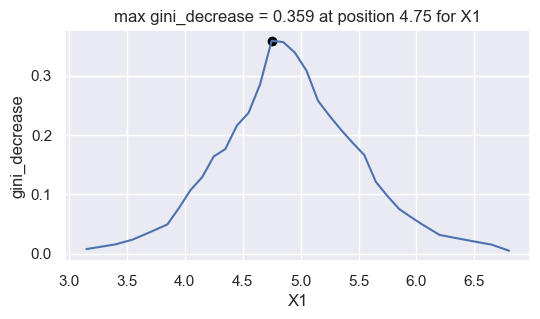

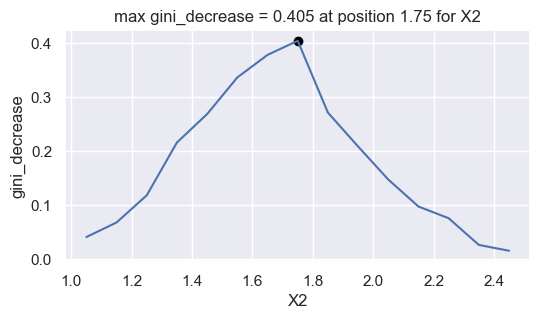

In [6]:
## call functions for both features    
find_split_position('X1')
find_split_position('X2')